# Trade-off curves

In [ ]:
# Generate data for problem.
import numpy as np

np.random.seed(1)
m = 25
n = 10
A = np.random.randn(m, n)
b = np.random.randn(m)

In [2]:
# Form and solve problem.
import cvxpy as cp

gamma = cp.Parameter(nonneg=True)
gamma.value = 1
x = cp.Variable(n)
cost = cp.sum_squares(A @ x - b) + gamma * cp.norm(x, 1)
prob = cp.Problem(cp.Minimize(cost), [cp.norm(x, "inf") <= 1])
opt_val = prob.solve()
solution = x.value

In [3]:
# For loop style trade-off curve.
gamma_vals = np.logspace(-4, 2, 100)
x_values = []
for val in gamma_vals:
    gamma.value = val
    prob.solve(solver='ECOS')
    x_values.append(x.value)

In [4]:
# Use tools for parallelism in standard library.
import dask

# Function maps gamma value to optimal x.
def get_x(gamma_value):
    gamma.value = gamma_value
    prob.solve(solver='ECOS')
    return x.value

dasklist = [dask.delayed(get_x)(val) for val in gamma_vals]
xs_dask = dask.compute(*dasklist, scheduler='processes')

Text(0.5, 1.0, 'Entries of $x$ versus $\\gamma$')

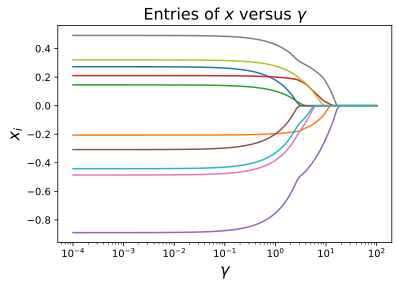

In [5]:
# Plot regularization path.
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

for i in range(n):
    plt.plot(gamma_vals, [xi[i] for xi in x_values])
plt.xlabel(r"$\gamma$", fontsize=16)
plt.ylabel(r"$x_i$", fontsize=16)
plt.xscale("log")
plt.title(r"Entries of $x$ versus $\gamma$", fontsize=16)